             Current   Ingrace  Delinquent  ChargedOff
Current     0.953623  0.008696    0.000000         0.0
Ingrace     0.333333  0.000000    0.666667         0.0
Delinquent  0.200000  0.000000    0.600000         0.2
ChargedOff       NaN       NaN         NaN         NaN


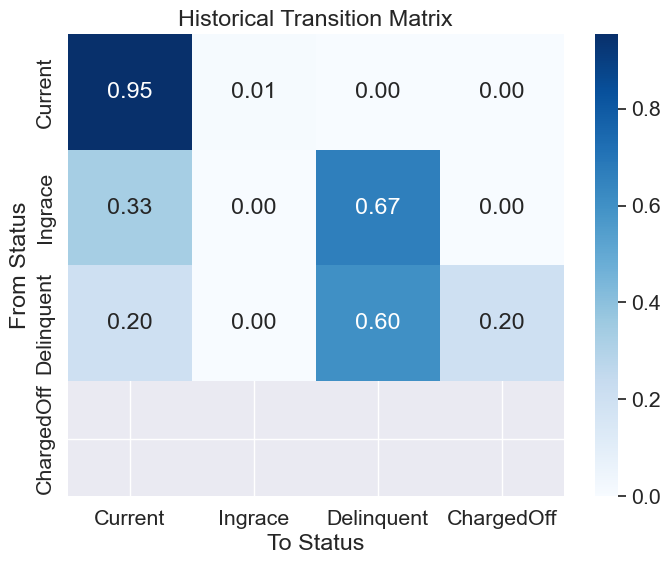

In [1]:
import pandas as pd
import numpy as np 
loan_data = pd.read_excel(r'C:\Users\vaibh\Downloads\Sample_loan_data.xlsx')

# Define the list of possible loan statuses
loan_statuses = ["Current","Ingrace","Delinquent", "ChargedOff"]

# Create a new column to represent the next derived loan status for each record
loan_data["next_loanstatus"] = loan_data.groupby("loanid")["loanstatus"].shift(-1)

# Create a pivot table to count the number of transitions from each loan status to the next
transition_counts = pd.pivot_table(loan_data,index="loanstatus",columns="nextderivedloanstatus",values="loanid",aggfunc="count",fill_value=0)

# Divide transition counts by initial status counts to get transition probabilities
initial_counts = loan_data["loanstatus"].value_counts()
transition_probs = transition_counts.div(initial_counts, axis=0)

# Store transition probabilities in a matrix or DataFrame
transition_matrix = pd.DataFrame(transition_probs, index=loan_statuses, columns=loan_statuses)

# Print the transition matrix
print(transition_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Historical Transition Matrix')
plt.xlabel('To Status')
plt.ylabel('From Status')
plt.show()

loan_data.to_csv("abc.csv")


In [2]:
import pandas as pd
import numpy as np 
loan_data = pd.read_excel(r'C:\Users\vaibh\Downloads\Sample_loan_data.xlsx')

# Create a new column for the number of days past due
loan_data["days_past_due"] = loan_data["days_dif"] 


In [3]:
loan_data['days_dif']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
349   NaN
350   NaN
351   NaN
352   NaN
353   NaN
Name: days_dif, Length: 354, dtype: float64

In [4]:


# Create a list of the new loan statuses, including the subdivided "Delinquent" statuses
loan_statuses = ["Current", "Ingrace","30dpd", "60dpd", "90dpd", "ChargedOff"]
loan_data.loc[loan_data["days_past_due"]==0,'loanstatus'] = "Current"

loan_data.loc[(loan_data["days_past_due"]>0) & (loan_data["days_past_due"]<30),'loanstatus'] = "Ingrace"
 
loan_data.loc[(loan_data["days_past_due"]>=30) & (loan_data["days_past_due"]<60),'loanstatus'] = "30dpd"
loan_data.loc[(loan_data["days_past_due"]>=60) & (loan_data["days_past_due"]<90),'loanstatus'] = "60dpd"  
loan_data.loc[(loan_data["days_past_due"]>=90) & (loan_data["days_past_due"]<120),'loanstatus'] = "90dpd"
loan_data.loc[loan_data["days_past_due"]>120,'loanstatus'] = "ChargedOff"



In [5]:
loan_data["next_loanstatus"] = loan_data.groupby("loanid")["loanstatus"].shift(-1)

In [6]:
loan_data[loan_data['loanstatus']=="ChargedOff"]

,loanid,asofdate,bankfundeddate,diff,maturitydate,interestrate,Monthly Interest rate,apr,Monthly Payment Amount,term,...,owner,platform,age,derivedloanstatus,nextderivedloanstatus,Unnamed: 31,Unnamed: 32,Unnamed: 33,days_past_due,next_loanstatus
73,L4,2021-01-31,2020-07-15,120,2030-07-31,2.69,0.002242,2.69,285.409129,120,...,AB_bank,pltA,6,ChargedOff,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_data['next_loanstatus'].fillna('Current', inplace=True)

In [8]:
transition_counts = pd.pivot_table(loan_data, index="loanstatus", columns="next_loanstatus", values="endbalance", aggfunc="sum", fill_value=0)
transition_counts

next_loanstatus,30dpd,60dpd,90dpd,ChargedOff,Current,Ingrace
loanstatus,,,,,,
30dpd,0.000000,62829.526315,0.000000,0.000000,0.000000e+00,0.000000
60dpd,0.000000,0.000000,33963.686297,0.000000,2.886584e+04,0.000000
90dpd,0.000000,0.000000,0.000000,33963.686297,0.000000e+00,0.000000
ChargedOff,0.000000,0.000000,0.000000,0.000000,3.396369e+04,0.000000
Current,0.000000,0.000000,0.000000,0.000000,9.509575e+06,91024.969061
Ingrace,62829.526315,0.000000,0.000000,0.000000,1.214838e+05,0.000000


In [9]:
transition_counts['sum']= transition_counts.iloc[:].sum(axis=1)
transition_counts

next_loanstatus,30dpd,60dpd,90dpd,ChargedOff,Current,Ingrace,sum
loanstatus,,,,,,,
30dpd,0.000000,62829.526315,0.000000,0.000000,0.000000e+00,0.000000,6.282953e+04
60dpd,0.000000,0.000000,33963.686297,0.000000,2.886584e+04,0.000000,6.282953e+04
90dpd,0.000000,0.000000,0.000000,33963.686297,0.000000e+00,0.000000,3.396369e+04
ChargedOff,0.000000,0.000000,0.000000,0.000000,3.396369e+04,0.000000,3.396369e+04
Current,0.000000,0.000000,0.000000,0.000000,9.509575e+06,91024.969061,9.600600e+06
Ingrace,62829.526315,0.000000,0.000000,0.000000,1.214838e+05,0.000000,1.843133e+05


In [10]:
for i in range(len(transition_counts)):
    transition_counts.iloc[i]= transition_counts.iloc[i]/transition_counts['sum'][i]

In [30]:
# transition_counts.iloc[[3,4,0,1,2],[4,5,0,1,2,3,6]]

next_loanstatus,Current,Ingrace,30dpd,60dpd,90dpd,ChargedOff,sum
loanstatus,,,,,,,
ChargedOff,1.000000,0.000000,0.0,0.0,0.000000,0.0,1.0
Current,0.990519,0.009481,0.0,0.0,0.000000,0.0,1.0
30dpd,0.000000,0.000000,0.0,1.0,0.000000,0.0,1.0
60dpd,0.459431,0.000000,0.0,0.0,0.540569,0.0,1.0
90dpd,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0


In [31]:
# transition_counts['sum']=transition_counts.sum()

In [32]:
# initial_counts= transition_counts['sum']
# transition_probs = transition_counts.div(initial_counts, axis=0)

# # Store transition probabilities in a matrix or DataFrame
# transition_matrix = pd.DataFrame(transition_probs, index=loan_statuses, columns=loan_statuses)


In [11]:
transition_counts

next_loanstatus,30dpd,60dpd,90dpd,ChargedOff,Current,Ingrace,sum
loanstatus,,,,,,,
30dpd,0.000000,1.0,0.000000,0.0,0.000000,0.000000,1.0
60dpd,0.000000,0.0,0.540569,0.0,0.459431,0.000000,1.0
90dpd,0.000000,0.0,0.000000,1.0,0.000000,0.000000,1.0
ChargedOff,0.000000,0.0,0.000000,0.0,1.000000,0.000000,1.0
Current,0.000000,0.0,0.000000,0.0,0.990519,0.009481,1.0
Ingrace,0.340884,0.0,0.000000,0.0,0.659116,0.000000,1.0


In [12]:
transition_matrix=transition_counts.iloc[[4,5,0,1,2,3],[4,5,0,1,2,3]]
transition_matrix

next_loanstatus,Current,Ingrace,30dpd,60dpd,90dpd,ChargedOff
loanstatus,,,,,,
Current,0.990519,0.009481,0.000000,0.0,0.000000,0.0
Ingrace,0.659116,0.000000,0.340884,0.0,0.000000,0.0
30dpd,0.000000,0.000000,0.000000,1.0,0.000000,0.0
60dpd,0.459431,0.000000,0.000000,0.0,0.540569,0.0
90dpd,0.000000,0.000000,0.000000,0.0,0.000000,1.0
ChargedOff,1.000000,0.000000,0.000000,0.0,0.000000,0.0


In [16]:
# def weighted_average_age(loan_data):
#     return ((loan_data["age"]*loan_data["endbalance"]).sum()/loan_data["endbalance"].sum())
# weighted_average_age(loan_data)

12.329257791945295

In [13]:

transition_matrix =transition_matrix.fillna(0)
# Define the initial state probabilities
initial_state = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# Calculate the CGL curve
cgl_curve_25 = []

for i in range(25):
    state_probabilities = np.dot(initial_state, np.linalg.matrix_power(transition_matrix, i))
    cgl_curve_25.append(state_probabilities)



In [14]:
df1= pd.DataFrame(cgl_curve_25)

In [15]:
df1

,0,1,2,3,4,5
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.990519,0.009481,0.000000,0.000000,0.000000,0.000000
2,0.987377,0.009391,0.003232,0.000000,0.000000,0.000000
3,0.984205,0.009361,0.003201,0.003232,0.000000,0.000000
4,0.982529,0.009331,0.003191,0.003201,0.001747,0.000000
5,0.980835,0.009316,0.003181,0.003191,0.001731,0.001747
6,0.980888,0.009299,0.003176,0.003181,0.001725,0.001731
7,0.980910,0.009300,0.003170,0.003176,0.001720,0.001725
8,0.980923,0.009300,0.003170,0.003170,0.001717,0.001720
9,0.980929,0.009300,0.003170,0.003170,0.001714,0.001717


In [16]:
# Print the CGL curve
print(cgl_curve_25)
ALLL = cgl_curve_25[24][5]-cgl_curve_25[13][5]
print(ALLL)

[array([1., 0., 0., 0., 0., 0.]), array([0.99051883, 0.00948117, 0.        , 0.        , 0.        ,
       0.        ]), array([0.98737673, 0.00939128, 0.00323198, 0.        , 0.        ,
       0.        ]), array([0.98420518, 0.00936149, 0.00320134, 0.00323198, 0.        ,
       0.        ]), array([0.98252894, 0.00933142, 0.00319119, 0.00320134, 0.00174711,
       0.        ]), array([0.9808347 , 0.00931553, 0.00318094, 0.00319119, 0.00173055,
       0.00174711]), array([0.98088848, 0.00929947, 0.00317552, 0.00318094, 0.00172506,
       0.00173055]), array([0.9809099 , 0.00929998, 0.00317004, 0.00317552, 0.00171951,
       0.00172506]), array([0.98092346, 0.00930018, 0.00317022, 0.00317004, 0.00171659,
       0.00171951]), array([0.98092898, 0.00930031, 0.00317028, 0.00317022, 0.00171363,
       0.00171659]), array([0.98093168, 0.00930036, 0.00317033, 0.00317028, 0.00171372,
       0.00171363]), array([0.98093146, 0.00930038, 0.00317035, 0.00317033, 0.00171376,
       0.00171372])

In [17]:
CECL = ALLL*1.5
CECL

2.0590899305929222e-08

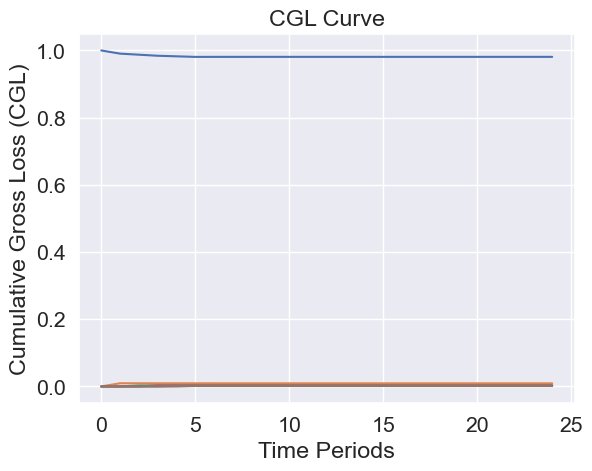

In [26]:
import matplotlib.pyplot as plt

# assume cgl_curve is a list of CGL values
plt.plot(cgl_curve_25)
plt.xlabel('Time Periods')
plt.ylabel('Cumulative Gross Loss (CGL)')
plt.title('CGL Curve')
plt.show()